# Walmart

## Import libraries

L'objectif du projet est de prédire le volume de ventes du magasin walmart en fonction de caractéristiques d'indicateurs économiques 

In [101]:


import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings



# EDA  

In [102]:
data = pd.read_csv("data/Walmart_Store_sales.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [103]:
print("Type information on dataset : \n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
Type information on dataset : 
 None


A part la colonne store, toutes les colonnes contiennent des valeurs manquantes en faible quantité. Nous allons retirer les lignes pour lesquelles la valeur dans la colonnes date et la colonne target weekly_sales sont manquante. Puis nous remplacecrons les valeurs manquantes des autres colonnes contenant des valeurs numériques par la moyenne de leurs valeurs.



In [104]:
data = data.dropna(subset=['Weekly_Sales', "Date"])
data
# data = data.fillna(data.mean())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


Transformons la date  en plusieurs colonnes heure , mois , jour de la semaine.

In [105]:
data['date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year
data['Day_of_week'] = data['date'].dt.weekday
data = data.drop(columns=['date', 'Date'])
data

/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/2054109482.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/2054109482.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date']=pd.to_datetime(data['Date'],infer_datetime_format=True)


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_of_week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,2,2011,4
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011,4
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010,4
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,28,5,2010,4
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011,4
...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,19,10,2012,4
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,18,6,2010,4
147,17.0,845252.21,0.0,57.14,2.841,126.111903,NaN,11,6,2010,4
148,8.0,856796.10,0.0,86.05,3.638,219.007525,NaN,12,8,2011,4


On vérifie les valeurs uniques de chaque colonne pour vérifier quelles colonnes sont catégorielles

In [106]:
# Afficher les valeurs uniques pour chaque colonne
for col in data.columns:
    unique_values = data[col].unique()
    print(f"Colonne {col}: {unique_values}")


Colonne Store: [ 6. 13.  4. 15. 20. 14.  8. 18.  7.  1. 17.  2.  5. 19.  3. 16. 12.  9.
 10. 11.]
Colonne Weekly_Sales: [1572117.54 1807545.43 1644470.66 1857533.7   695396.19 2203523.2
 2600519.26  895066.5  1029618.1   414094.05 1677472.78  829207.27
 1498080.16 1997397.63 2432736.52  561145.14  290930.01 1074079.
 1427023.45 1405007.44  919878.34  367438.62  435397.19  757738.76
 1420405.41 1021154.48  563460.77 2077256.24 1266564.94  365248.94
  988157.72 2008344.92  311906.7   961186.23  526525.16  629994.47
 1641957.44 1861802.7   268929.03 1549018.68 1624383.75  485095.41
 2035431.39 1916812.74  509263.28 1879451.23 1805999.79 1847430.96
  888816.78 1532308.78 2020550.99 2095599.93 1990371.02 1295605.35
  313358.15 2771397.17 1166117.85  461622.22  955913.68 1588430.71
 2461468.35 1449142.92 1508068.77 1973135.87  570611.23 1539483.7
 1789687.65  519823.3  1758050.79  431985.36  485389.15  964332.51
 1953544.76 1494251.5   860336.16  298697.84 1768172.31 2018314.71
  364076.85 1

les colonnes Holiday_Flag, Store, Day, Month, Year, et Day_of_week sont catégorielles. Mais nous verrons plus bas que les variables de date seront traitées différemment pour l'application du modèle du machine learning.

In [107]:
print(round(100*data.isnull().sum()/data.shape[0] , 1))

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    7.6
Temperature     9.3
Fuel_Price      9.3
CPI             7.6
Unemployment    9.3
Day             0.0
Month           0.0
Year            0.0
Day_of_week     0.0
dtype: float64


Nous allons remplacer les valeurs manquantes dans la colonne catégorielle Holiday_flag par le mode puis nous imputerons les données manquante dans les colonnes numériques temprature , fuel price, CPI et unemployment par la médiane


In [108]:
data['Holiday_Flag'] = data['Holiday_Flag'].fillna(data['Holiday_Flag'].mode()[0])
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].median())
data['Fuel_Price'] = data['Fuel_Price'].fillna(data['Fuel_Price'].median())
data['CPI'] = data['CPI'].fillna(data['CPI'].median())
data['Unemployment'] = data['Unemployment'].fillna(data['Unemployment'].median())
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_of_week
0,6.0,1572117.54,0.0,59.61,3.045,214.777523,6.858,18,2,2011,4
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011,4
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010,4
5,4.0,1857533.70,0.0,61.79,2.756,126.160226,7.896,28,5,2010,4
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011,4
...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,19,10,2012,4
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,18,6,2010,4
147,17.0,845252.21,0.0,57.14,2.841,126.111903,7.484,11,6,2010,4
148,8.0,856796.10,0.0,86.05,3.638,219.007525,7.484,12,8,2011,4


Nous pouvons à présent jeter à n oeil à la distribution des données

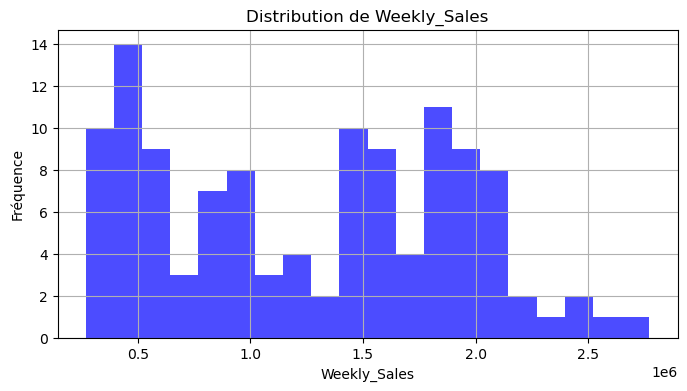

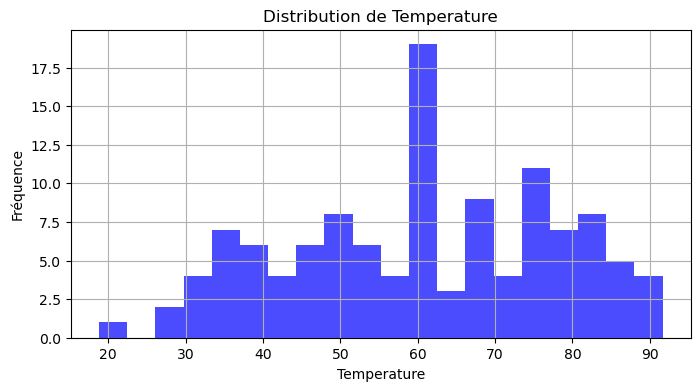

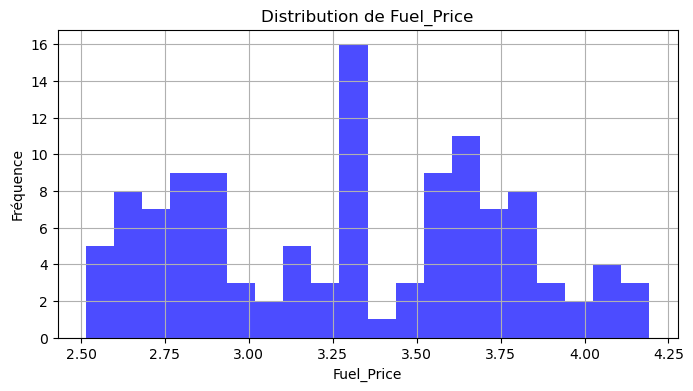

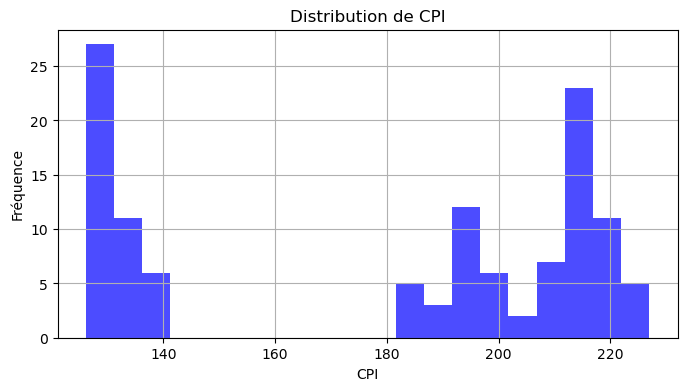

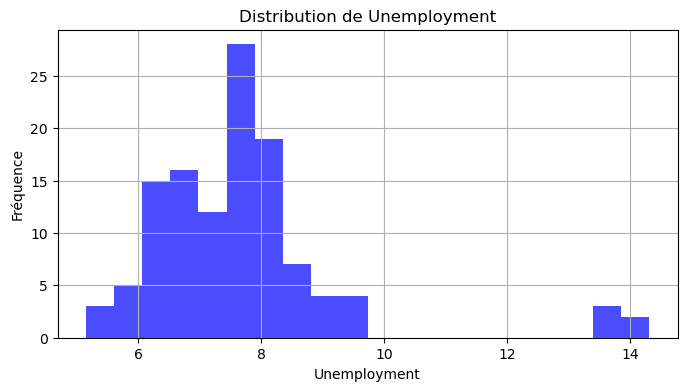

In [109]:
import matplotlib.pyplot as plt

# Sélectionnez les caractéristiques numériques
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Créez un histogramme pour chaque caractéristique numérique
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(data[feature], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()

il semblerait que la caractéristique unemployment ait une distribution normale sans considérer les outliers qu'il sera nécessaire de rtirer. La température et le prix du fuel semblent faire apparaitre deux pics tout comme les deux tendances qui se dégagent nettement dans la distribution des CPI. La target weekly_sales semble être également distribuée sans outliers évidents.
Nous identifierons les outliers dont la valeur se situe à plus ou moins 3 ecart type de la moyenne  pour ces 4 catégories numériques.


Nous allons maintenant véirfier la distribution des valeurs catégorielles

/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/3897969162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_counts.index, y=store_counts.values, ax=axes[0], palette='pastel')
/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/3897969162.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_counts.index, y=holiday_counts.values, ax=axes[1], palette='bright')


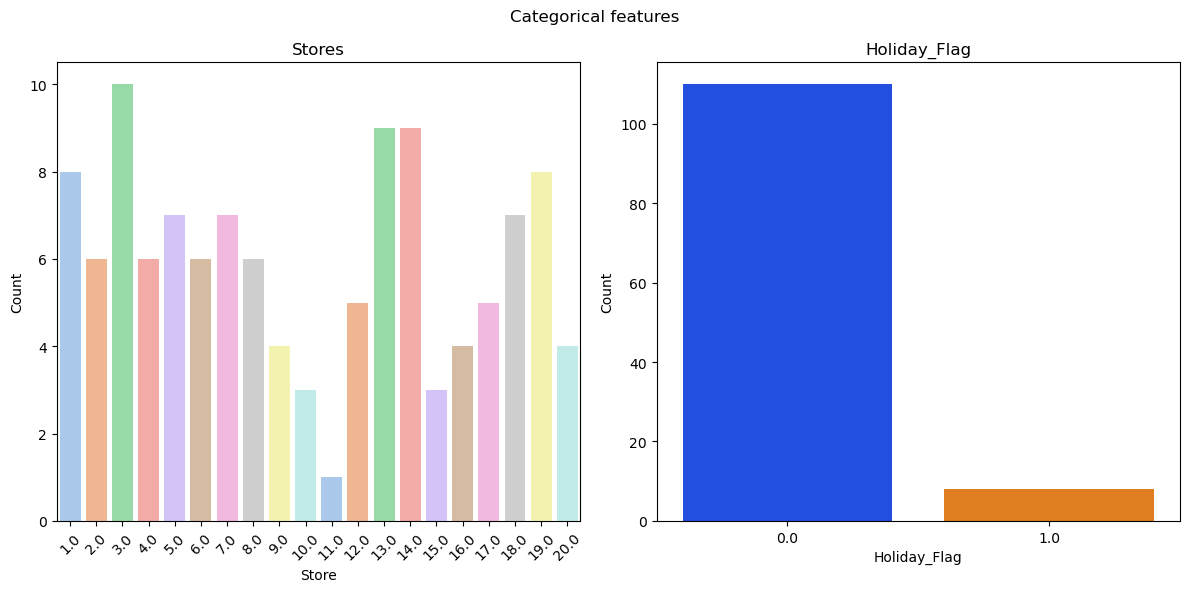

Percentage of holiday flag: 6.78 %


In [110]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for "Store"
store_counts = data['Store'].value_counts()
sns.barplot(x=store_counts.index, y=store_counts.values, ax=axes[0], palette='pastel')
axes[0].set_title('Stores')
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for "Holiday_Flag"
holiday_counts = data['Holiday_Flag'].value_counts()
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, ax=axes[1], palette='bright')
axes[1].set_title('Holiday_Flag')
axes[1].set_xlabel('Holiday_Flag')
axes[1].set_ylabel('Count')

plt.suptitle('Categorical features')
plt.tight_layout()
plt.show()

# Percentage of 'Holiday_Flag' with value 1
holiday_flag_counts = data['Holiday_Flag'].value_counts()
percentage_holiday_flag_1 = (holiday_flag_counts[1] / len(data['Holiday_Flag'])) * 100
print(f"Percentage of holiday flag: {percentage_holiday_flag_1:.2f} %")



la colonne holiday est très déséquilibrée avec seulement 6.78% de valeurs représentant la catégorie 1 holiday.
La variable store est également distribué à travers tous les difféente magasins 

/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/642294897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Day_of_week', ax=axes[0], palette='pastel')
/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/642294897.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Month', ax=axes[1], palette='bright')
/var/folders/5b/ztc331md4ggczldfj23439g80000gn/T/ipykernel_32229/642294897.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Year', ax=axes[2], palette='deep')

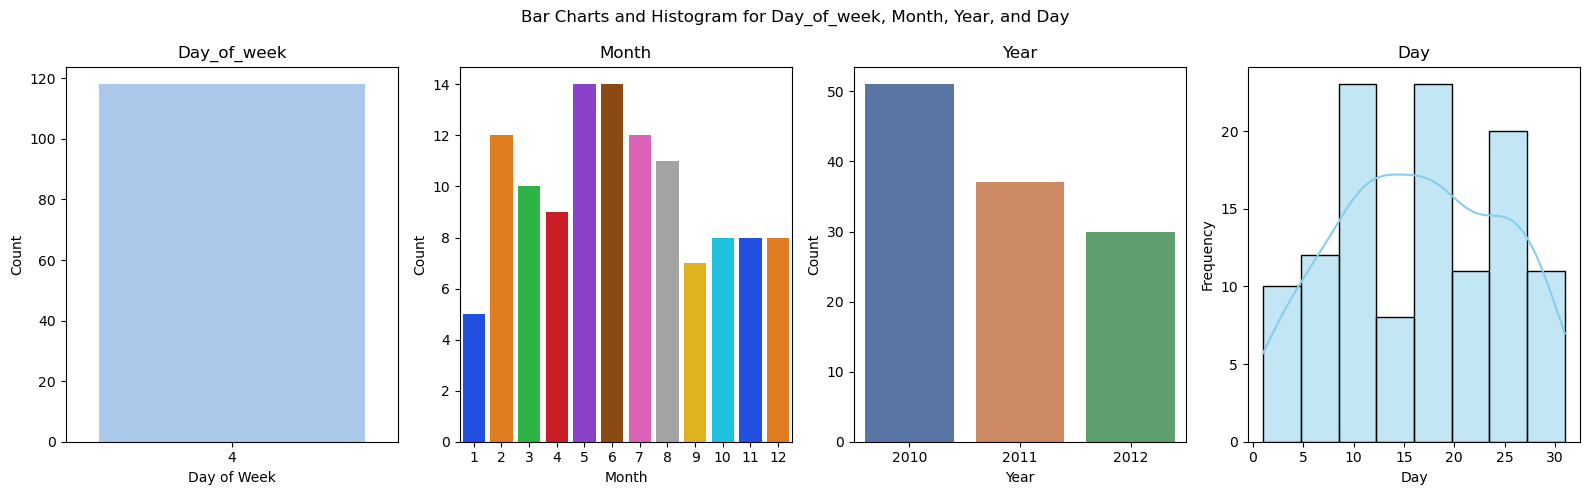

In [111]:


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Bar chart for "Day_of_week"
sns.countplot(data=data, x='Day_of_week', ax=axes[0], palette='pastel')
axes[0].set_title('Day_of_week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

# Bar chart for "Month"
sns.countplot(data=data, x='Month', ax=axes[1], palette='bright')
axes[1].set_title('Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Bar chart for "Year"
sns.countplot(data=data, x='Year', ax=axes[2], palette='deep')
axes[2].set_title('Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Count')

# Histogram for "Day"
sns.histplot(data=data, x='Day', kde=True, ax=axes[3], color='skyblue', edgecolor='black')
axes[3].set_title('Day')
axes[3].set_xlabel('Day')
axes[3].set_ylabel('Frequency')

# Set the title for the entire subplot
plt.suptitle('Bar Charts and Histogram for Day_of_week, Month, Year, and Day')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



La colonne day of week suggère que l'étude s'est concentrée sur le 5e jour de la semaine (vendredi). Nous pouvons donc  retirer cette colonne car non informative.
Si on regarde les ventes au mois, on remarque qu'il y a une diminution des ventes dès le mois de janvier, et qu'il y a un pic des ventes en mai et juin. De façon générale, les ventes sont plus importantes à la fin du prntemps et tout au long de l'été jusqu'en septembre puis diinue à l'automne de septembre pour se satbiliser jusqu'en décembre. 

Nous allons maintenant retirer les outliers pour chacune des variables caractéristiques numériques en considérant comme outliers toutes les données qui sont plus de 3 fois la moyenne.

In [112]:

# Calculez la moyenne et l'écart-type de chaque colonne caractéristique numérique
def outlier_removal(column):
    moyenne = data[column].mean()
    ecart_type = data[column].std()

    # Définissez une limite pour les outliers (par exemple, ±3 écarts-types)
    limite_superieure = moyenne + 3 * ecart_type
    limite_inferieure = moyenne - 3 * ecart_type
    # Comptez le nombre de lignes d'outliers
    nombre_outliers = len(data) - len(data[(data[column] >= limite_inferieure) & (data[column] <= limite_superieure)])

    # Filtrer les données pour supprimer les outliers
    data_filtre = data[(data[column] >= limite_inferieure) & (data[column] <= limite_superieure)]
    # Afficher le nombre d'outliers retirés
    print(f"Nombre d'outliers retirés : {nombre_outliers}") 
    # Afficher les données filtrées
    # print(data_filtre)

    return data_filtre

outlier_removal('Temperature')
outlier_removal('Fuel_Price')
outlier_removal('CPI')
outlier_removal('Unemployment')



Nombre d'outliers retirés : 0
Nombre d'outliers retirés : 0
Nombre d'outliers retirés : 0
Nombre d'outliers retirés : 5


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_of_week
0,6.0,1572117.54,0.0,59.61,3.045,214.777523,6.858,18,2,2011,4
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011,4
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010,4
5,4.0,1857533.70,0.0,61.79,2.756,126.160226,7.896,28,5,2010,4
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011,4
...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,19,10,2012,4
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,18,6,2010,4
147,17.0,845252.21,0.0,57.14,2.841,126.111903,7.484,11,6,2010,4
148,8.0,856796.10,0.0,86.05,3.638,219.007525,7.484,12,8,2011,4


Tel que visualisé dans les histogrammes ci-dessus, nous pouvons voir que les données de la colonne unemployement présente des outliers, 5 lignes ont été retirées du dataframe.

Nous allons représenter une matrice de corrélation des variables explicatives de notre jeu de données.

La matrice de corrélation permet de comprendre les relations entre les Variables en visualisant les relations linéaires entre les variables explicatives. Elle indique à quel point les variables sont corrélées les unes aux autres. 

In [113]:
for column in data.columns:
    print(column)

Store
Weekly_Sales
Holiday_Flag
Temperature
Fuel_Price
CPI
Unemployment
Day
Month
Year
Day_of_week


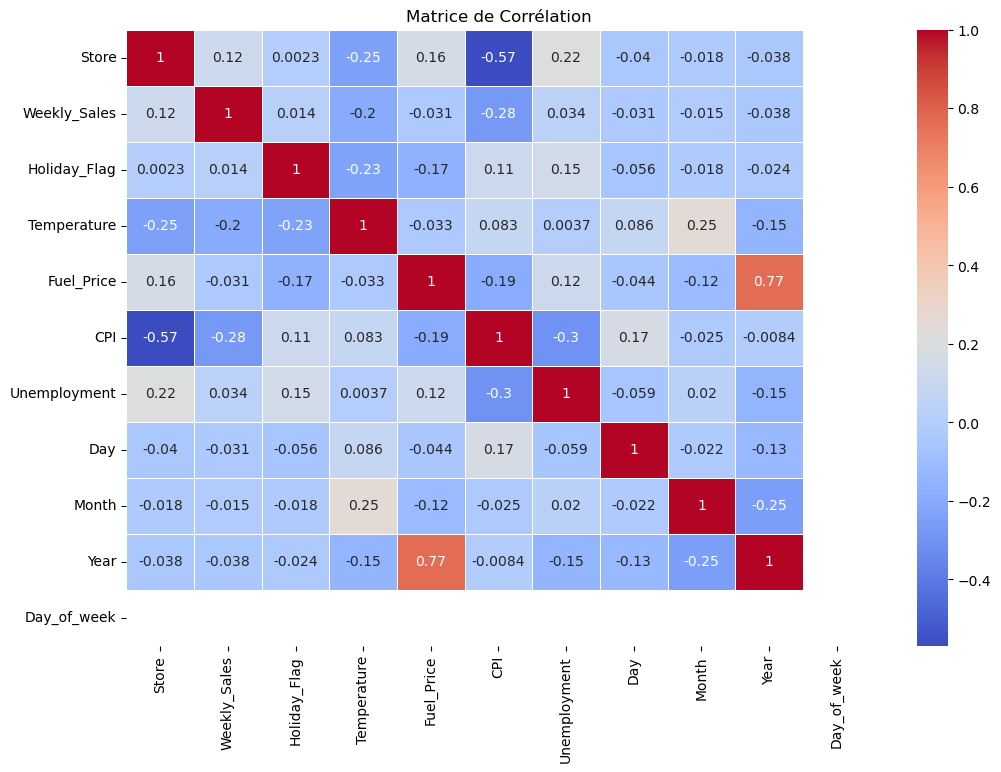

   Variable1     Variable2  Correlation
0      Store         Store     1.000000
1      Store  Weekly_Sales     0.124586
2      Store  Holiday_Flag     0.002270
3      Store   Temperature    -0.249218
4      Store    Fuel_Price     0.156245
..       ...           ...          ...
95      Year           CPI    -0.008381
96      Year  Unemployment    -0.148768
97      Year           Day    -0.125230
98      Year         Month    -0.251476
99      Year          Year     1.000000

[100 rows x 3 columns]


In [114]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Créer une figure et un axe pour le tracé
plt.figure(figsize=(12, 8))

# Tracer la matrice de corrélation sous forme de heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Ajouter un titre
plt.title('Matrice de Corrélation')

# Afficher la figure
plt.show()

# Créer un DataFrame à partir de la matrice de corrélation
correlation_df = pd.DataFrame(corr_matrix.stack(), columns=['Correlation'])

# Réinitialiser l'index pour avoir des colonnes séparées pour les noms de variables
correlation_df.reset_index(inplace=True)
correlation_df.rename(columns={'level_0': 'Variable1', 'level_1': 'Variable2'}, inplace=True)

# Afficher le DataFrame des corrélations
print(correlation_df)
correlation_df.to_csv("correlation_df.csv")

Weekly_Sales - Store (0.1246) : Il y a une corrélation positive faible entre les ventes hebdomadaires et le magasin. Cela signifie que certains magasins ont tendance à avoir des ventes plus élevées que d'autres, mais la corrélation n'est pas très forte.

Weekly_Sales - Temperature (-0.1981) : Il y a une corrélation négative modérée entre les ventes hebdomadaires et la température. Cela suggère que lorsque la température augmente, les ventes hebdomadaires tendent à diminuer. Cela peut être dû au fait que les gens préfèrent faire des achats par temps plus frais.

Weekly_Sales - CPI (-0.2792) : Il y a une corrélation négative modérée entre les ventes hebdomadaires et l'indice des prix à la consommation (CPI). Cela peut signifier que lorsque le CPI augmente (ce qui peut indiquer une augmentation des prix), les ventes hebdomadaires ont tendance à diminuer.

Fuel_Price - Year (0.7654) : Il y a une corrélation positive forte entre le prix du carburant et l'année. Cela peut s'expliquer par l'augmentation constante du prix du carburant au fil des ans.

CPI - Unemployment (-0.3017) : Il y a une corrélation négative modérée entre l'indice des prix à la consommation (CPI) et le taux de chômage. Cela peut signifier que lorsque le taux de chômage augmente, le CPI a tendance à diminuer.

Month - Temperature (0.2493) : Il y a une corrélation positive modérée entre le mois et la température. Cela suggère que les mois plus chauds ont tendance à avoir des températures plus élevées ce qui est logique.



Il ne faut pas oublier pas que la corrélation ne signifie pas nécessairement une relation de causalité, et d'autres facteurs peuvent être en jeu. Il est important de mener des analyses plus approfondies pour obtenir des insights plus précis.

# Régression linéaire baseline

A partir de la matrice de corrélation obtenue et l'EDA de façon générale nous pouvons sélectionner les features qui semblent les plus pertinentes pour expliquer la variable cible weekly_sales en appliquant un modèle de regression linéaire . Temperature, store, CPI, unemployment, month et Fuel_Price sont les  variables sélectionnées au final après plusieurs essais où nous avons identifié l'amélioration du score R2. 
Nous devons identifier quelles colonnes contiennent des variables catégorielles et quelles colonnes contiennent des variables numériques, car elles seront traitées différemment. Les variables de date sont un peu particulières : elles pourraient être considérées comme catégorielles, mais cela créerait trop de variables après la préparation des données (chaque catégorie devient une variable, ce qui signifie chaque mois, chaque jour, etc.), ce qui pourrait entraîner un surajustement. Nous pourrions les traiter comme numériques, mais cela peut entraîner plusieurs problèmes et malentendus : nous perdrions des informations importantes (est-ce un week-end, un mois spécial comme Noël, etc.), nous pourrions créer des relations mathématiques incorrectes, nous perdrions le pattern cyclique (janvier suit décembre), etc. Pour ces raisons, nous traiterons spécifiquement les variables de date.

In [115]:
for column in data.columns:
    print(column)

Store
Weekly_Sales
Holiday_Flag
Temperature
Fuel_Price
CPI
Unemployment
Day
Month
Year
Day_of_week


In [116]:
features_list = ['Store','Temperature','Month','Unemployment', 'CPI', 'Fuel_Price']
X = data[features_list]
Y = data['Weekly_Sales']

numeric_indices = [1,3,4,5]
categorical_indices = [0]
date_indices = [2]

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


#Séparation des données en train et test    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


Y : 
0    1572117.54
1    1807545.43
4    1644470.66
5    1857533.70
6     695396.19
Name: Weekly_Sales, dtype: float64

X :
   Store  Temperature  Month  Unemployment         CPI  Fuel_Price
0    6.0        59.61      2         6.858  214.777523       3.045
1   13.0        42.38      3         7.470  128.616064       3.435
4    6.0        78.89      5         7.092  212.412888       2.759
5    4.0        61.79      5         7.896  126.160226       2.756
6   15.0        69.80      6         7.658  134.855161       4.069


On crée des pipelines de transformation pour les différents types de variables (numériques, catégorielles et  date) et on les applique aux colonnes spécifiques du jeu de données X en utilisant une transformation en colonne (ColumnTransformer) pour prétraiter et encoder les caractéristiques avant d'entraîner notre modèle.

In [117]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features; handle_unknown in case some categories are not in train and test
    ])

# Create pipeline for date features
date_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # for dates it makes no sense to choose a median !
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    # It is not great to scale dates, and one-hot-encoder will create too many columns. 
    # This is more relevant and can be used in our case as our dates are ordered. 
    ])

# Applying pipeline on X variables depending on columns
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices),
        ('date',date_transformer, date_indices)
        ]
    )





In [118]:
print("Performing preprocessings on train set...")
# X_train_dense = X_train.toarray() # Convert the sparse matrix to a dense NumPy array
# print(X_train_dense[:5])
print(X_train[:5])
X_train_transformed = feature_encoder.fit_transform(X_train)
print('...Done.')
print(X_train_transformed[:5])
print()

print("Performing preprocessings on test set...")
# X_test_dense = X_test.toarray()
# print(X_test_dense[:5])
print(X_test[:5])
X_test_transformed = feature_encoder.transform(X_test)
print('...Done.')
print(X_test_transformed[:5])
print()

# Preprocessing target variable

Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

scaler = StandardScaler()

print("Preprocessing Y_train and Y_test")
Y_train_transformed = scaler.fit_transform(Y_train)
print(Y_train_transformed[0:5,:])
Y_test_transformed = scaler.transform(Y_test)
print(Y_test_transformed[0:5,:])


Performing preprocessings on train set...
     Store  Temperature  Month  Unemployment         CPI  Fuel_Price
52     9.0        85.02      6         7.484  214.896576       2.653
15     6.0        68.91      4         7.092  211.894272       2.780
20     7.0        38.26      4         8.963  189.704822       2.725
90     9.0        78.51      7         6.442  214.656430       2.642
136    4.0        84.59      7         5.644  129.112500       3.469
...Done.
  (0, 7)	1.0
  (0, 18)	1.4752093191751188
  (0, 19)	-0.10908087894468496
  (0, 20)	0.9446370629008685
  (0, 21)	-1.3565652540884847
  (0, 22)	5.0
  (1, 4)	1.0
  (1, 18)	0.5061937555420615
  (1, 19)	-0.3565663926047899
  (1, 20)	0.866111130503101
  (1, 21)	-1.0822280132139028
  (1, 22)	3.0
  (2, 5)	1.0
  (2, 18)	-1.3374019629776908
  (2, 19)	0.8246718626453545
  (2, 20)	0.2857409043358727
  (2, 21)	-1.2010354797343907
  (2, 22)	3.0
  (3, 7)	1.0
  (3, 18)	1.0836331975580367
  (3, 19)	-0.7669377800513932
  (3, 20)	0.9383560017719541

/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [119]:
# Train model
print("Train model...")
regressor = LinearRegression() # The target being numerical, we use linear regression.
regressor.fit(X_train_transformed, Y_train_transformed)
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train_transformed)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test_transformed)
print("...Done.")
print(Y_test_pred)
print()

# R^2 scores
r2_train = r2_score(Y_train_transformed, Y_train_pred)
r2_test = r2_score(Y_test_transformed, Y_test_pred)


print("r2_train: ", r2_train)
print("r2_test: ", r2_test)


Train model...
...Done.
Predictions on training set...
...Done.
[[-1.30862695]
 [ 0.38844744]
 [-1.07209685]
 [-1.14397233]
 [ 1.23846488]
 [ 0.4588802 ]
 [ 0.91774072]
 [-1.1633714 ]
 [ 0.37921709]
 [ 1.72537917]
 [-1.34763339]
 [-0.45924757]
 [ 0.40773336]
 [ 1.08708069]
 [-1.15224057]
 [-0.36035277]
 [ 1.22245588]
 [ 0.88645514]
 [ 0.2137755 ]
 [ 1.09946584]
 [-0.43780156]
 [ 0.90274093]
 [ 0.98136062]
 [-0.91308036]
 [ 0.26874085]
 [ 0.55023828]
 [-1.11789308]
 [-1.66063919]
 [ 0.46004126]
 [-1.06165687]
 [-0.18146984]
 [-0.65432294]
 [ 1.14446696]
 [-1.32117462]
 [-1.33411618]
 [ 1.247894  ]
 [ 0.11070965]
 [ 1.3099425 ]
 [ 1.06825212]
 [-0.54198787]
 [-0.12060928]
 [ 1.19234272]
 [ 1.20284094]
 [ 1.17284432]
 [-0.1732081 ]
 [-1.44081017]
 [-0.91053724]
 [ 1.70585563]
 [ 0.72003156]
 [-1.07527511]
 [-1.18881913]
 [-1.29816385]
 [ 1.17674062]
 [ 0.23862689]
 [ 0.95240907]
 [ 1.54026789]
 [ 0.35517641]
 [ 1.20173713]
 [ 0.9404194 ]
 [-0.74767338]
 [-1.20419645]
 [-0.4611853 ]
 [-0.4

Les r2 scores suggèrent une bonne qualité d'ajustement du modèle aux données
Nous allons évaluer la performance du modèle de régression à généraliser sur différents ensembles de données à l'aide de la validation croisée. 

In [120]:
scores = cross_val_score(regressor,X_train_transformed, Y_train_transformed, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.9147120905980305
standard deviation : 0.03947536825879365


La précision moyenne de notre modèle de régression, mesurée en utilisant la validation croisée avec 10 partitions différentes de nos données d'entraînement, est d'environ 0,915. La précision est une mesure de la performance du modèle, et dans ce contexte, elle indique à quel point les prédictions de votre modèle correspondent bien aux valeurs réelles de notre variable cible.

L'écart-type (standard deviation) est une mesure de la variabilité des performances de notre modèle sur différentes partitions des données d'entraînement. Dans notre cas, l'écart-type est d'environ 0,0395. Cela signifie que les performances de notre modèle ne varient pas beaucoup d'une partition de données à l'autre, ce qui est une bonne chose. Un écart-type faible suggère que notre modèle est stable et que ses performances sont cohérentes sur différentes parties de vos données.

En résumé, notre modèle de régression semble avoir une précision moyenne d'environ 0,915, ce qui est un bon indicateur de performance. De plus, la faible valeur de l'écart-type suggère que cette performance est cohérente et ne varie pas beaucoup en fonction des partitions de données utilisées. Cela indique une certaine robustesse de notre modèle. 

# Régression linéaire basique et avec régularisation

On définit un dictionnaire appelé models qui contient deux modèles de régression linéaire régularisée : Ridge et Lasso. Chaque modèle est associé à un ensemble de paramètres qu'on souhaitez optimiser pour trouver la meilleure configuration du modèle. 

In [122]:


models = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001,  0.005, 0.01, 0.1, 1.0, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'max_iter': [5000, 10000],
            'tol': [1e-3, 1e-4, 1e-5],
            'fit_intercept': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10, 100],
            'selection': ['cyclic', 'random'],
            'max_iter': [100, 200, 500, 1000, 5000],
            'tol': [1e-3, 1e-4, 1e-5]
        }
    }
}



In [144]:


models = {
    'basic' : {
        'model' : LinearRegression(),
        'params' : {
            'fit_intercept': [True, False]
                            }
        
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001,  0.005, 0.01, 0.1, 1.0, 10, 100],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'max_iter': [5000, 10000],
            'tol': [1e-3, 1e-4, 1e-5],
            'fit_intercept': [True, False]        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10, 100],
            'selection': ['cyclic', 'random'],
            'max_iter': [5000, 10000],
            'tol': [1e-3, 1e-4, 1e-5],
            'fit_intercept': [True, False]        }
    }
}



On effectue une recherche des meilleurs hyperparamètres pour les trois modèles de régression linéaire basique et régularisée (Ridge et Lasso) à l'aide d'une GridSearchCV.

In [157]:

results_r2 = []
results_mae = []
results_mse = []

for name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    print(model)
    grid_search = GridSearchCV(model, params, cv=10, scoring='r2')
    grid_search.fit(X_train_transformed, Y_train_transformed)
    best_params = grid_search.best_params_ 
    best_model = grid_search.best_estimator_ #Une fois la recherche terminée, le modèle avec les meilleurs paramètres est extrait
    #print("\n best params is : \n", best_params)
    # Predictions en utilisant le meilleur modèle
    Y_train_pred = best_model.predict(X_train_transformed)
    Y_test_pred = best_model.predict(X_test_transformed)
    
    # Metrics
    r2_train = r2_score(Y_train_transformed, Y_train_pred) #Coefficient de détermination R-squared sur l'ensemble de train
    r2_test = r2_score(Y_test_transformed, Y_test_pred) #Coefficient de détermination R-squared sur l'ensemble de test
    mae_test = mean_absolute_error(Y_test_transformed, Y_test_pred) #Erreur absolue moyenne sur l'ensemble de test
    mse_test = mean_squared_error(Y_test_transformed, Y_test_pred) #Erreur quadratique moyenne sur l'ensemble de test
    #rmse_test = np.sqrt(mse_test) #Racine carrée de l'erreur quadratique moyenne sur l'ensemble de test.

    scores_r2 = cross_val_score(best_model,X_train_transformed, Y_train_transformed, cv=10, scoring='r2')
    avg_r2 = scores_r2.mean()
    std_r2 = scores_r2.std()
    #print('Cross-validated accuracy mean R2 score: {}\nstandard deviation : {}'.format(avg_r2, std_r2))

    results_r2.append({ #Les résultats, y compris le nom du modèle, les meilleurs hyperparamètres, et les métriques de performance, sont stockés dans une liste results à chaque itération de la boucle.
        'Model': name,
        #'Alpha': best_params['alpha'],
        'R2 Test Score': r2_test,
        'avg crossval score R2': avg_r2,
        'std crossval score R2': std_r2,
    })
    scores_mae = cross_val_score(best_model,X_train_transformed, Y_train_transformed, cv=10, scoring='neg_mean_absolute_error')
    avg_mae = scores_mae.mean()
    std_mae = scores_mae.std()
    #print('Cross-validated accuracy mean MAE : {}\nstandard deviation : {}'.format(avg_mae, std_mae))

    results_mae.append({ #Les résultats, y compris le nom du modèle, les meilleurs hyperparamètres, et les métriques de performance, sont stockés dans une liste results à chaque itération de la boucle.
        'Model': name,
        #'Alpha': best_params['alpha'],
        'MAE Test Score': mae_test,
        'avg crossval score MAE': avg_mae,
        'std crossval score MAE': std_mae,
    })

    scores_mse = cross_val_score(best_model,X_train_transformed, Y_train_transformed, cv=10, scoring='neg_mean_squared_error')
    avg_mse = scores_mse.mean()
    std_mse = scores_mse.std()
    #print('Cross-validated mean MSE score : {}\nstandard deviation : {}'.format(avg_mse, std_mse))

    results_mse.append({ #Les résultats, y compris le nom du modèle, les meilleurs hyperparamètres, et les métriques de performance, sont stockés dans une liste results à chaque itération de la boucle.
        'Model': name,
        #'Alpha': best_params['alpha'],
        'MSE Test Score': mse_test,
        'avg crossval score MSE': avg_mse,
        'std crossval score MSE': std_mse,
    })


results_df_r2 = pd.DataFrame(results_r2)
print(results_df_r2)


results_df_mae = pd.DataFrame(results_mae)
print(results_df_mae)


results_df_mse = pd.DataFrame(results_mse)
print(results_df_mse)

LinearRegression()
Ridge()


/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized

Lasso()
   Model  R2 Test Score  avg crossval score R2  std crossval score R2
0  basic       0.952846               0.919142               0.038239
1  Ridge       0.952369               0.919445               0.038036
2  Lasso       0.948729               0.920961               0.037920
   Model  MAE Test Score  avg crossval score MAE  std crossval score MAE
0  basic        0.150400               -0.199034                0.052046
1  Ridge        0.150757               -0.198323                0.052545
2  Lasso        0.151776               -0.195092                0.052095
   Model  MSE Test Score  avg crossval score MSE  std crossval score MSE
0  basic        0.036110               -0.073718                0.043753
1  Ridge        0.036474               -0.073568                0.043633
2  Lasso        0.039262               -0.072472                0.042884


Par

# Feature importances

On prend toutes les caractéristiques (catégorielles, numériques et de date) utilisées dans nos trois modèles de régression, on récupère les coefficients associés à chacune de ces caractéristiques, et on les trie par ordre d'importance décroissante pour faciliter l'analyse des facteurs qui influent le plus sur nos prédictions de modèle.
Puis on crée un graphique à barres horizontales qui affiche les valeurs des coefficients associés à chaque caractéristique du modèle de régression, ce qui permet de visualiser l'importance relative de chaque caractéristique dans les prédictions du modèle.

On va comparer les coefficients entre les modèles pour avoir des informations sur la manière dont la régularisation affecte la modélisation et la sélection de variables.

OneHotEncoder(drop='first', handle_unknown='ignore')
              coefficients
Store_5.0        -1.902396
Store_3.0        -1.685419
Store_9.0        -1.636689
Store_16.0       -1.532966
Store_7.0        -1.347321
Store_14.0        1.053759
Store_4.0         1.044763
Store_8.0        -1.026783
Store_15.0       -0.977686
Store_17.0       -0.955533
Store_10.0        0.945018
Store_13.0        0.889789
Store_2.0         0.627253
Store_20.0        0.580954
Store_18.0       -0.306291
Unemployment     -0.154263
Store_12.0        0.147428
Store_19.0        0.136579
CPI               0.097560
Temperature      -0.080886
Fuel_Price       -0.072138
Store_6.0         0.032074
Month             0.030397


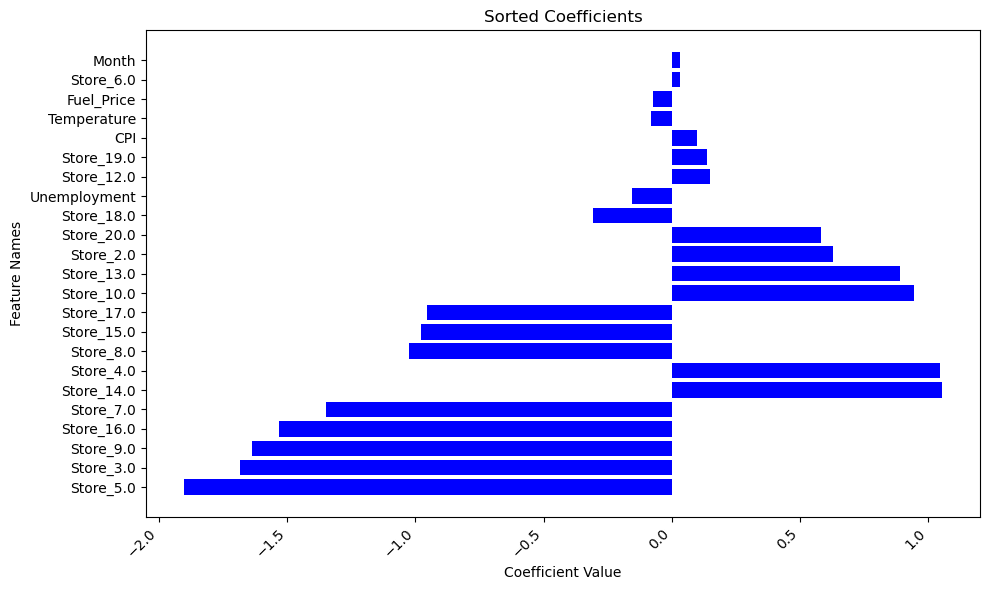

In [150]:


# Data before preprocessing
all_features_df = pd.concat([X_train, X_test], ignore_index=True)

# Column names after preprocessing
num_names = all_features_df.columns[numeric_indices].tolist()
date_names = all_features_df.columns[date_indices].tolist()
categorical_encoder = feature_encoder.named_transformers_['cat']['encoder'] # for categorical we need to decode
print(categorical_encoder)
cat_names = categorical_encoder.get_feature_names_out(input_features=all_features_df.columns[categorical_indices])
all_feature_names = list(cat_names) + num_names + date_names # now we have each category of each variable names

# Combine the feature names and coefficients into a DataFrame
coefs = pd.DataFrame(index=all_feature_names, data=regressor.coef_.flatten(), columns=["coefficients"])
coefs_sorted = coefs.reindex(coefs['coefficients'].abs().sort_values(ascending=False).index)

print(coefs_sorted)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(coefs_sorted)), coefs_sorted['coefficients'], color='blue')
plt.yticks(np.arange(len(coefs_sorted)), coefs_sorted.index)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Names')
plt.title('Sorted Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



OneHotEncoder(drop='first', handle_unknown='ignore')
LinearRegression()
              coefficients
Store_5.0        -1.857654
Store_3.0        -1.639705
Store_9.0        -1.592257
Store_16.0       -1.464995
Store_7.0        -1.276829
Store_4.0         1.170320
Store_14.0        1.129213
Store_10.0        1.074771
Store_13.0        1.008535
Store_8.0        -0.979165
Store_15.0       -0.847330
Store_17.0       -0.828097
Store_2.0         0.679830
Store_20.0        0.637949
Store_12.0        0.277811
Store_19.0        0.260830
Store_18.0       -0.193601
Unemployment     -0.154617
CPI               0.133268
Store_6.0         0.080778
Temperature      -0.080374
Fuel_Price       -0.073237
Month             0.031664


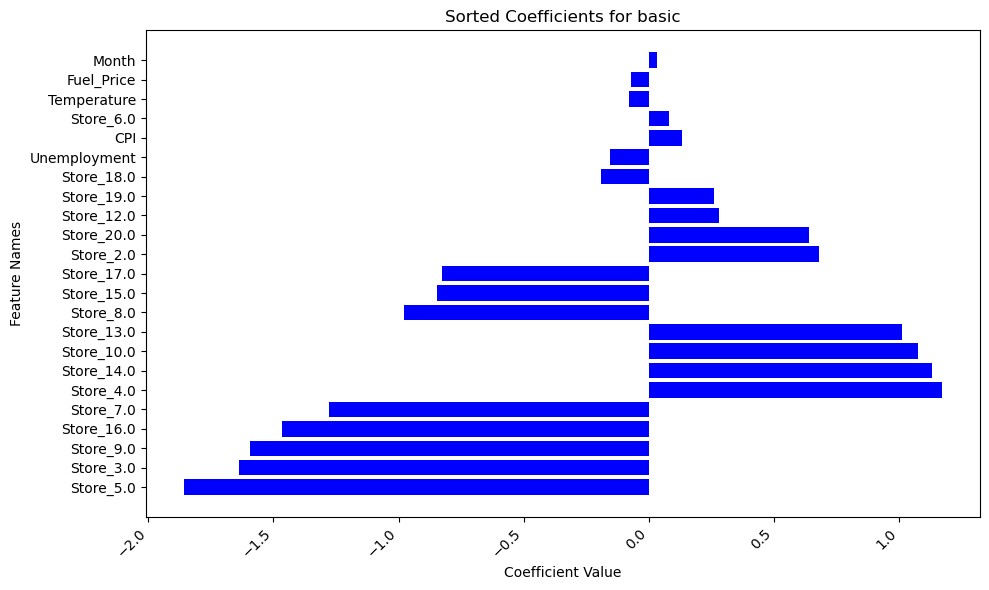

Ridge()


/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized

              coefficients
Store_5.0        -1.842249
Store_3.0        -1.626537
Store_9.0        -1.574437
Store_16.0       -1.453772
Store_7.0        -1.276362
Store_4.0         1.162295
Store_14.0        1.125496
Store_10.0        1.056914
Store_13.0        0.998969
Store_8.0        -0.962242
Store_15.0       -0.847161
Store_17.0       -0.833901
Store_2.0         0.685589
Store_20.0        0.641872
Store_19.0        0.247471
Store_12.0        0.236095
Store_18.0       -0.206939
Unemployment     -0.147455
CPI               0.124847
Store_6.0         0.091640
Temperature      -0.080815
Fuel_Price       -0.071468
Month             0.031820


/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1320 fits failed out of a total of 4620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py", line

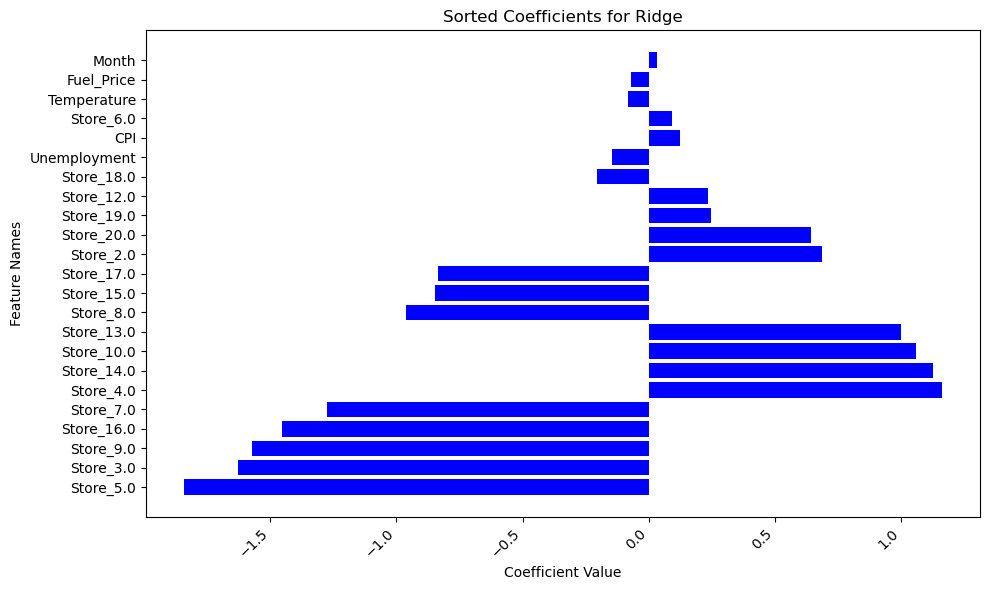

Lasso()
              coefficients
Store_5.0        -1.769163
Store_3.0        -1.560941
Store_9.0        -1.482962
Store_16.0       -1.395627
Store_7.0        -1.272829
Store_4.0         1.112199
Store_14.0        1.100852
Store_10.0        0.944815
Store_13.0        0.940006
Store_8.0        -0.863699
Store_17.0       -0.855879
Store_15.0       -0.804499
Store_2.0         0.705300
Store_20.0        0.646815
Store_18.0       -0.269643
Store_19.0        0.160457
Store_6.0         0.129192
Unemployment     -0.107593
Temperature      -0.080667
CPI               0.080525
Fuel_Price       -0.059479
Month             0.033388
Store_12.0        0.000000


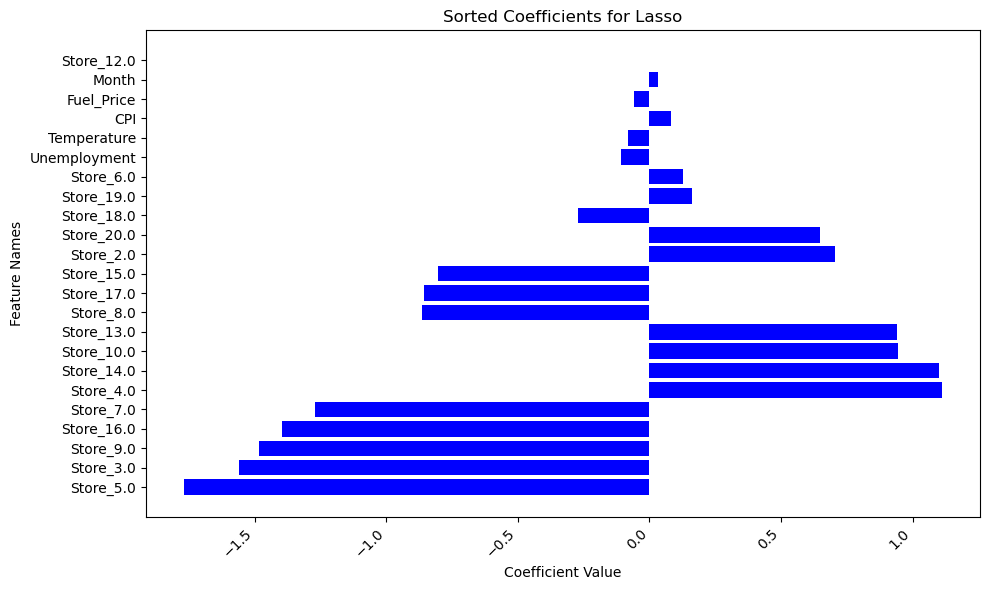

In [161]:



# Data before preprocessing
all_features_df = pd.concat([X_train, X_test], ignore_index=True)

# Column names after preprocessing
num_names = all_features_df.columns[numeric_indices].tolist()
date_names = all_features_df.columns[date_indices].tolist()
categorical_encoder = feature_encoder.named_transformers_['cat']['encoder'] # for categorical we need to decode
print(categorical_encoder)
cat_names = categorical_encoder.get_feature_names_out(input_features=all_features_df.columns[categorical_indices])
all_feature_names = list(cat_names) + num_names + date_names # now we have each category of each variable names

for name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    print(model)
    grid_search = GridSearchCV(model, params, cv=10, scoring='r2')
    grid_search.fit(X_train_transformed, Y_train_transformed)
    best_params = grid_search.best_params_ 
    best_model = grid_search.best_estimator_ #Une fois la recherche terminée, le modèle avec les meilleurs paramètres est extrait
    # Combine the feature names and coefficients into a DataFrame
    coefs = pd.DataFrame(index=all_feature_names, data=best_model.coef_.flatten(), columns=["coefficients"])
    coefs_sorted = coefs.reindex(coefs['coefficients'].abs().sort_values(ascending=False).index)

    print(coefs_sorted)

    # Plot the coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(len(coefs_sorted)), coefs_sorted['coefficients'], color='blue')
    plt.yticks(np.arange(len(coefs_sorted)), coefs_sorted.index)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Names')
    plt.title('Sorted Coefficients for '+ name)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



In [160]:
for name, model_info in models.items():
    model = model_info['model']
    params = model_info['params']
    print(model)
    grid_search = GridSearchCV(model, params, cv=10, scoring='r2')
    grid_search.fit(X_train_transformed, Y_train_transformed)
    best_params = grid_search.best_params_ 

LinearRegression()
Ridge()


/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  warnings.warn(
/Users/amandinesandri/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:832: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized

Lasso()


In [159]:
for name, model_info in models.items():
    print(name)
    print(model_info)

basic
{'model': LinearRegression(), 'params': {'fit_intercept': [True, False]}}
Ridge
{'model': Ridge(), 'params': {'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'tol': [0.001, 0.0001, 1e-05], 'fit_intercept': [True, False]}}
Lasso
{'model': Lasso(), 'params': {'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10, 100], 'selection': ['cyclic', 'random'], 'tol': [0.001, 0.0001, 1e-05], 'fit_intercept': [True, False]}}


Les valeurs positives indiquent une corrélation positive avec la variable cible (augmentation de la variable entraîne une augmentation de la variable cible), tandis que les valeurs négatives indiquent une corrélation négative (augmentation de la variable entraîne une diminution de la variable cible). Par exemple, les magasins Store_5.0, Store_3.0 et Store_9.0 ont des coefficients négatifs, ce qui signifie qu'ils ont une influence négative sur la variable cible (Weekly_Sales), tandis que Store_14.0, Store_4.0 et Store_10.0 ont des coefficients positifs, ce qui signifie qu'ils ont une influence positive sur la variable cible. Pour les autres caractéristiques telles que l'Unemployment, le CPI, la Temperature, le Fuel_Price et le Month ont également des coefficients qui indiquent leur impact sur les ventes hebdomadaire:
Unemployment (Taux de chômage) : Le coefficient négatif indique qu'une augmentation du taux de chômage est associée à une diminution des ventes hebdomadaires. Cela signifie que les semaines où le taux de chômage est plus élevé, les ventes ont tendance à être plus faibles.

CPI (Indice des prix à la consommation) : Le coefficient positif suggère qu'une augmentation de l'indice des prix à la consommation est associée à une augmentation des ventes hebdomadaires. Cela peut signifier que lorsque les prix à la consommation augmentent, les ventes augmentent également, peut-être parce que les consommateurs dépensent plus.Mais le coefficient est très faible, ce qui signifie que la relation entre les ventes et les prix à la consommation est faible.

Temperature (Température) : Le coefficient négatif indique qu'une augmentation de la température est associée à une diminution des ventes hebdomadaires. Cela peut sembler contre-intuitif, mais cela peut être dû au fait que les gens préfèrent faire leurs achats par temps plus frais.

Fuel_Price (Prix du carburant) : Le coefficient négatif suggère qu'une augmentation du prix du carburant est associée à une diminution des ventes hebdomadaires. Cela pourrait signifier que lorsque le prix du carburant augmente, les gens sont moins enclins à conduire pour faire des achats.

Month (Mois) : Le coefficient positif ou négatif dépendra du mois de l'année qui est encodé. Par exemple, un coefficient positif pour un mois donné signifierait que ce mois particulier est associé à une augmentation des ventes par rapport à un mois de référence. Un coefficient négatif signifierait le contraire.